In [10]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# 分类树的学习
# clf = tree.DecisionTreeClassifier()  # 实例化
# clf = clf.fit(x_train, y_train)  # 训练
# result = clf.score(x_test, y_test)  # 测试集产生结果

# 参数1
# criterion： gini/entrophy
# 数据维度大，噪声大时使用gini
# 维数低，数据清晰 无区别
# 决策树拟合程度不够，用信息熵

wine = load_wine()
wine.data.shape

(178, 13)

In [11]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis= 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
# 随机划分测试集 训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.2)

In [16]:
Xtrain.shape

(142, 13)

In [17]:
clf_wine = tree.DecisionTreeClassifier(criterion="entropy")
clf_wine = clf_wine.fit(Xtrain, Ytrain)
score = clf_wine.score(Xtest, Ytest)

score

0.8333333333333334

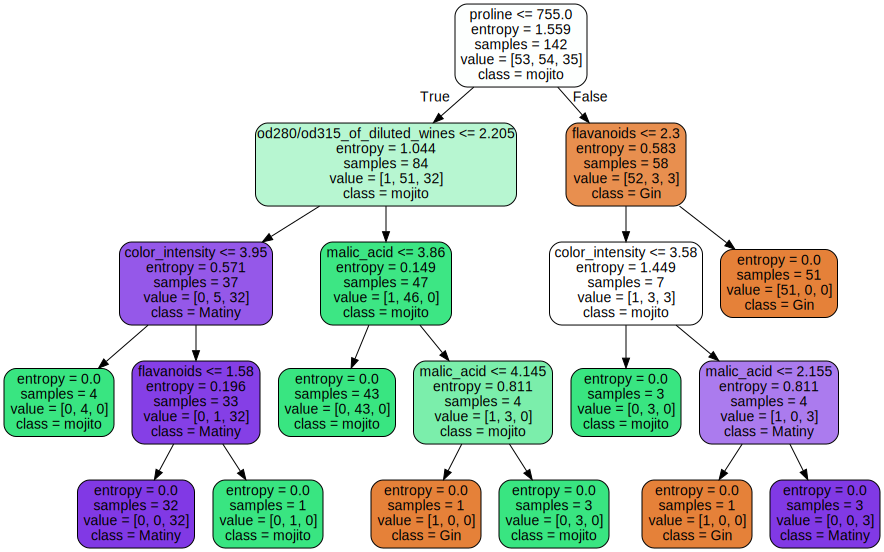

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf_wine
                                ,feature_names = wine.feature_names
                                ,class_names = ["Gin", "mojito", 'Matiny'] 
                                , filled = True # 填充颜色
                                , rounded = True # 是否圆角
)
graph = graphviz.Source(dot_data)
graph

In [19]:
clf_wine.feature_importances_

array([0.        , 0.04619308, 0.        , 0.        , 0.        ,
       0.        , 0.1361977 , 0.        , 0.        , 0.09743526,
       0.        , 0.26892605, 0.45124792])

In [20]:
# zip用法 将feture_name和feature_importances_形成二元组
[*zip(wine.feature_names, clf_wine.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.04619307821947737),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.1361976964498525),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.09743525676597097),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.26892605033922373),
 ('proline', 0.4512479182254755)]

In [21]:
# parameter2&3： random_state & splitter
# 随机选择部分特征，生成不同的树 后进行选择
# 若总是基于最优节点仅一棵树
# 分支中的随机模式的参数，random_state默认None 种子数，
# 在高维度算计型表现更明显，低维度的数据随机性几乎不会现显现
# splitter表示选择特征时的先后
# 默认为best，优先最优节点选择
# random， 随机
# 特征较多一定会过拟合时采用
clf_wine1 = tree.DecisionTreeClassifier(criterion="entropy"
                                       , random_state=0
                                       , splitter = 'random' )
clf_wine1 = clf_wine1.fit(Xtrain, Ytrain)
score1 = clf_wine1.score(Xtest, Ytest)

score1

0.8888888888888888

In [22]:
# 剪枝参数

# clf_wine1对训练集的拟合程度
score_train = clf_wine1.score(Xtrain, Ytrain)
score_train

1.0

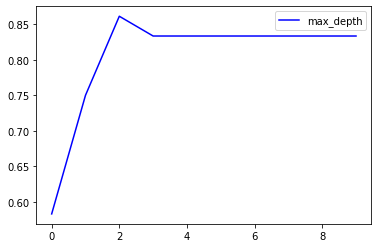

In [23]:
# max_depth
# - 高维度-低样本量
# - 建议从3开始设置
# min_samples_leaf
# - 限定一个节点在分枝后的每个子节点至少包含min_sample_leaf个样本，否则分支不会发生，
#   或者分支会朝着每个子节点包含min_samples_leafs个样本方向去发生
# - suggestion 从5
# - 与max_depth配合使用
# - 若有训练集和测试集划分不平衡，输入浮点数使用。 如0.05取样本总数的0.05
# - 可保证叶子节点的规模，回归问题中避免低方差过拟合
# min_samples_split
# - 一个结点至少包含min_samples_split个样本，才被允许分支
# max_features
# - 分枝时考虑的特征参数
# - 暴力，强行设定。不推荐， 若要对特征降维->PCA ICA
# min_impuriity_decrease
# - 信息增益小于某个值时部分值

# 超参数调参
# 调整max_depth作为参数调整，将score画出来
import matplotlib.pyplot as plt

test = []  # the score with max_depth
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                      , random_state = 0
                                      , splitter = 'best'
                                      , max_depth = i+1
#                                       , min_samples_leaf = 5
#                                       , min_samples_split = 10
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(10), test, color = 'blue', label = 'max_depth')
plt.legend()
plt.show()

In [ ]:
# 目标权重参数
# 完成样本标签平衡的参数。 决策树自生会向样本标签多的部分倾斜
# class_weight
# - 给少数标签更多的权重，使模型更偏向少数类
# min_weight_fraction_leaf
# - 权重下的剪枝参数

In [24]:
# 重要属性&接口
# 属性： 训练模型之后，能够查看模型的参数，如feature_imortances等
# 接口: fit &score & apply & predict
# - apply: 返回每个测试样本对应叶子节点的索引
# - predict: 返回每个测试样本的分类或是回归值
# 不接受一维矩阵：若存在 reshape(1，-1)给矩阵增惟

clf.apply(Xtest)
clf.predict(Xtest) == Ytest
clf.score(Xtest,Ytest)

0.8333333333333334